Gaussian Mixture Model algorithm : Perform clustering on the following Dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df1 = df.drop('CUST_ID', axis = 1) 
df1.fillna(method ='bfill', inplace = True) 

In [5]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df1) 

In [6]:
normalized_df = normalize(df1) 

In [7]:
normalized_df = pd.DataFrame(normalized_df) 

In [8]:
pca = PCA(n_components = 3) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'] 
pcadf.head(10)

,Principal Component 1,Principal Component 2,Principal Component 3
0,-0.315801,-0.045331,0.021005
1,0.315592,-0.156902,0.369849
2,-0.207156,-0.182853,-0.122065
3,-0.294886,-0.115253,-0.105940
4,0.140351,-0.089815,-0.090702
5,0.357316,0.198259,-0.407317
6,-0.196032,0.372616,-0.000407
7,0.114108,-0.126426,-0.256003
8,-0.325109,-0.103615,-0.032240
9,-0.402152,-0.055033,0.042919


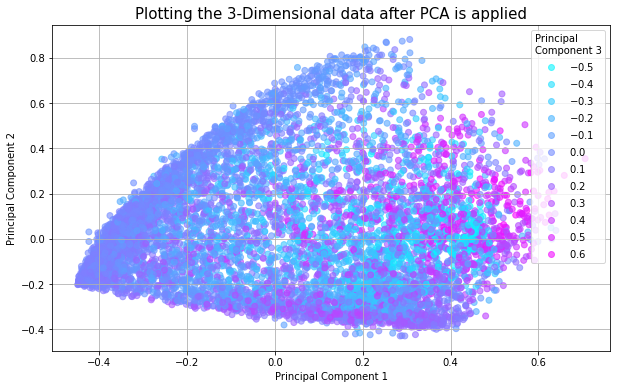

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(pcadf['Principal Component 1'],
                     pcadf['Principal Component 2'], 
                     c = pcadf['Principal Component 3'],
                     alpha=0.6, cmap = 'cool')
plt.title('Plotting the 3-Dimensional data after PCA is applied', fontsize = 15)
plt.xlabel('Principal Component 1', fontsize = 10)
plt.ylabel('Principal Component 2', fontsize = 10)
plt.legend(*scatter.legend_elements(), loc="best", title="Principal\nComponent 3")
ax.plot([])
ax.grid()
plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.33143791, 0.2751133 , 0.16474062])

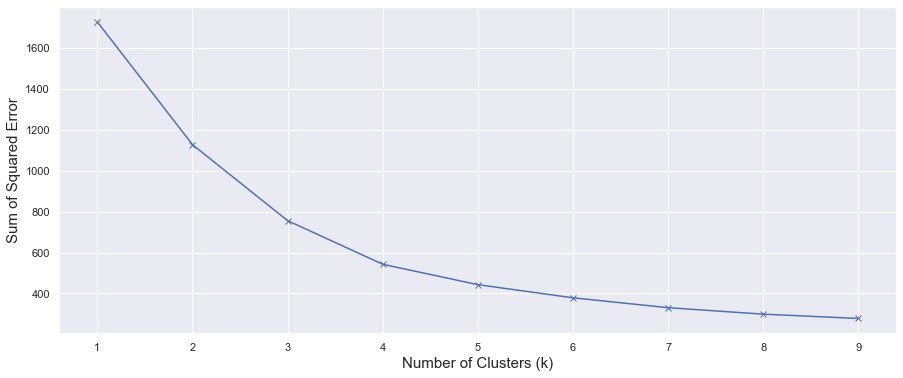

In [11]:
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.show()

In [12]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(pcadf)

GaussianMixture(n_components=3)

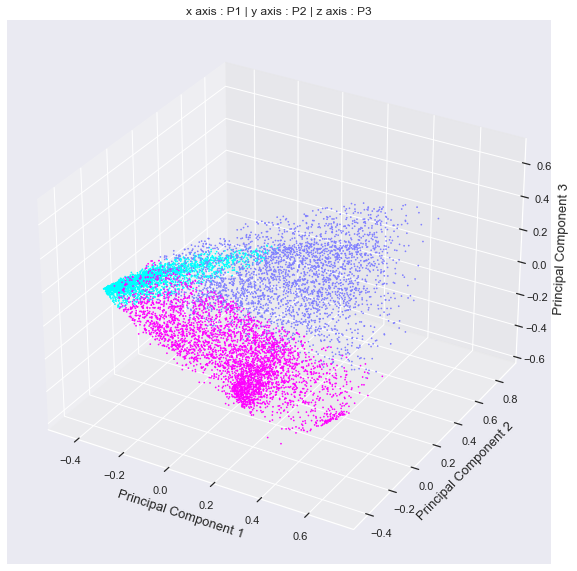

In [13]:
fig = plt.figure(figsize = (10, 10))        
x, s1 = pcadf['Principal Component 1'], "Principal Component 1"
y, s2 = pcadf['Principal Component 2'], "Principal Component 2"
z, s3 = pcadf['Principal Component 3'], "Principal Component 3"
c = gmm.fit_predict(pcadf) 
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = c, s=0.5, alpha = 1, cmap = 'cool')
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)
plt.show()

In [14]:
y_pred = gmm.predict(pcadf)
pred = pd.DataFrame(y_pred)
pred.columns = ['Type']

prediction = pd.concat([pcadf, pred], axis = 1)

clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]

cluster_list = [clus0.values, clus1.values, clus2.values]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pcadf
y = gmm.fit_predict(pcadf)
print("Clusters\tSilhoutte Score\n")
for n_components in range(2, 11):
    gmm = GaussianMixture(n_components=n_components).fit(X)
    sil_coeff = silhouette_score(X, c, metric='euclidean')
    print("k = {} \t \t{}".format(n_components, sil_coeff))

Clusters	Silhoutte Score

k = 2 	 	0.28539395131259343
k = 3 	 	0.28539395131259343
k = 4 	 	0.28539395131259343
k = 5 	 	0.28539395131259343
k = 6 	 	0.28539395131259343
k = 7 	 	0.28539395131259343
k = 8 	 	0.28539395131259343
k = 9 	 	0.28539395131259343
k = 10 	 	0.28539395131259343


In [15]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pcadf, y_pred)

1.3183248528199922